# Speech enhancement
## Brief introduction
 Speech enhancement simply consists in taking noised audios and trying to eliminate the noise \& separate it from the clean speech, so as to make it as similar as possible to the original clean audio.

Initially, we tested pretty much all the denoisers we found on HuggingFace, most of which were variants of SepFormer pre-trained on different datasets (WHAM!, VoiceBank + Demand ...etc). Given that they provided quite similar results, we decided to only use one: [SepFormer pre-trained on WHAM!](https://huggingface.co/speechbrain/sepformer-wham16k-enhancement)

##Imports
(datasets, libraries ...etc)

In [ ]:
!git clone https://gitlab-student.centralesupelec.fr/marwa.hanafi/robust-ser.git

Cloning into 'robust-ser'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 67 (delta 24), reused 1 (delta 1), pack-reused 14
Receiving objects: 100% (67/67), 473.26 MiB | 11.31 MiB/s, done.
Resolving deltas: 100% (24/24), done.
Updating files: 100% (10/10), done.


In [ ]:
#.json file to import datasets from kaggle
!mkdir -p ~/.kaggle
!cp /content/robust-ser/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#importing clean ravdess
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
 97% 417M/429M [00:02<00:00, 167MB/s]
100% 429M/429M [00:02<00:00, 155MB/s]


In [ ]:
#importing noised & denoised ravdess which we previously created & uploaded into kaggle
!kaggle datasets download -d marwah22/noised-ravdess-17-05
!kaggle datasets download -d marwah22/denoised-test-ravdess

Dataset URL: https://www.kaggle.com/datasets/marwah22/noised-ravdess-17-05
License(s): Apache 2.0
 98% 849M/870M [00:10<00:00, 98.4MB/s]
100% 870M/870M [00:10<00:00, 84.8MB/s]
Dataset URL: https://www.kaggle.com/datasets/marwah22/denoised-test-ravdess
License(s): Apache 2.0
 92% 215M/234M [00:02<00:00, 134MB/s]
100% 234M/234M [00:02<00:00, 92.2MB/s]


In [ ]:
#Now that we've imported the datasets, let's unzip them
#unzip noised ravdess
!mkdir -p '/content/noised_ravdess'
!unzip '/content/noised-ravdess-17-05.zip' -d '/content/noised_ravdess'
#unzip denoised ravdess
!mkdir -p '/content/denoised_ravdess'
!unzip '/content/denoised-test-ravdess.zip' -d '/content/denoised_ravdess'
#unzip clean_ravdess
!mkdir -p '/content/clean_ravdess'
!unzip '/content/ravdess-emotional-speech-audio.zip' -d '/content/clean_ravdess'

Streaming output truncated to the last 5000 lines.
  inflating: /content/denoised_ravdess/SNR_-5/Actor_24/03-01-06-02-01-02-24.wav  
  inflating: /content/denoised_ravdess/SNR_-5/Actor_24/03-01-06-02-02-01-24.wav  
  inflating: /content/denoised_ravdess/SNR_-5/Actor_24/03-01-06-02-02-02-24.wav  
  inflating: /content/denoised_ravdess/SNR_-5/Actor_24/03-01-07-01-01-01-24.wav  
  inflating: /content/denoised_ravdess/SNR_-5/Actor_24/03-01-07-01-01-02-24.wav  
  inflating: /content/denoised_ravdess/SNR_-5/Actor_24/03-01-07-01-02-01-24.wav  
  inflating: /content/denoised_ravdess/SNR_-5/Actor_24/03-01-07-01-02-02-24.wav  
  inflating: /content/denoised_ravdess/SNR_-5/Actor_24/03-01-07-02-01-01-24.wav  
  inflating: /content/denoised_ravdess/SNR_-5/Actor_24/03-01-07-02-01-02-24.wav  
  inflating: /content/denoised_ravdess/SNR_-5/Actor_24/03-01-07-02-02-01-24.wav  
  inflating: /content/denoised_ravdess/SNR_-5/Actor_24/03-01-07-02-02-02-24.wav  
  inflating: /content/denoised_ravdess/SNR_-5/A

In [ ]:
#import the model pre-trained on clean ravdess (we uploaded it as a dataset in kaggle for practicality)
!kaggle datasets download -d marwah22/pretrained-on-clean-ravdess

Dataset URL: https://www.kaggle.com/datasets/marwah22/pretrained-on-clean-ravdess
License(s): Apache 2.0
 99% 1.09G/1.09G [00:17<00:00, 49.7MB/s]
100% 1.09G/1.09G [00:17<00:00, 66.4MB/s]


In [ ]:
#needed for the denoiser
!pip install speechbrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.1/760.1 kB 8.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
import os
import matplotlib.pyplot as plt
import torchaudio
import torch
from speechbrain.inference.separation import SepformerSeparation as separator

## 1st experiment: inferring directly on denoised data

In [ ]:
#import the function to do inference
%cd '/content/robust-ser'
from inference import model_inference
%cd ..
#path du modèle pre-trained sur clean Ravdess
zipped_model_path = '/content/pretrained-on-clean-ravdess.zip'
#unzip the model
!unzip '/content/pretrained-on-clean-ravdess.zip' -d '/content'

/content/robust-ser
GPU available: Tesla T4
/content
Archive:  /content/pretrained-on-clean-ravdess.zip
  inflating: /content/rav_classifier  


In [ ]:
model_path = '/content/rav_classifier'
for folder_name in os.listdir('/content/denoised_ravdess'):
  noised_path = os.path.join('/content/noised_ravdess', folder_name)
  print('Accuaracy on noised version of '+ folder_name  +':')
  model_inference(noised_path + '/', model_path = model_path )
  print('Accuracy on denoised version ' + folder_name + ':')
  denoised_path = os.path.join('/content/denoised_ravdess', folder_name)
  model_inference(denoised_path + '/', model_path = model_path )

Accuaracy on noised version of SNR_10:


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.83k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of the model checkpoint at superb/hubert-large-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametri

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

preprocessor_config.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

100%|██████████| 180/180 [00:14<00:00, 12.78it/s, loss=2.235, accuracy=0.683]


The final accuracy on the test dataset: 68.3333%
Accuracy on denoised version SNR_10:


Some weights of the model checkpoint at superb/hubert-large-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametri

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

100%|██████████| 180/180 [00:12<00:00, 14.58it/s, loss=1.431, accuracy=0.606]


The final accuracy on the test dataset: 60.5556%
Accuaracy on noised version of SNR_-5:


Some weights of the model checkpoint at superb/hubert-large-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametri

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

100%|██████████| 180/180 [00:12<00:00, 14.52it/s, loss=2.920, accuracy=0.467]


The final accuracy on the test dataset: 46.6667%
Accuracy on denoised version SNR_-5:


Some weights of the model checkpoint at superb/hubert-large-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametri

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

100%|██████████| 180/180 [00:12<00:00, 14.32it/s, loss=1.431, accuracy=0.606]


The final accuracy on the test dataset: 60.5556%
Accuaracy on noised version of SNR_0:


Some weights of the model checkpoint at superb/hubert-large-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametri

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

100%|██████████| 180/180 [00:12<00:00, 14.15it/s, loss=2.642, accuracy=0.578]


The final accuracy on the test dataset: 57.7778%
Accuracy on denoised version SNR_0:


Some weights of the model checkpoint at superb/hubert-large-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametri

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

100%|██████████| 180/180 [00:12<00:00, 13.89it/s, loss=1.431, accuracy=0.606]


The final accuracy on the test dataset: 60.5556%
Accuaracy on noised version of SNR_15:


Some weights of the model checkpoint at superb/hubert-large-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametri

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

100%|██████████| 180/180 [00:12<00:00, 13.87it/s, loss=1.782, accuracy=0.694]


The final accuracy on the test dataset: 69.4444%
Accuracy on denoised version SNR_15:


Some weights of the model checkpoint at superb/hubert-large-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametri

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

100%|██████████| 180/180 [00:13<00:00, 13.64it/s, loss=1.431, accuracy=0.606]


The final accuracy on the test dataset: 60.5556%
Accuaracy on noised version of SNR_5:


Some weights of the model checkpoint at superb/hubert-large-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametri

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

100%|██████████| 180/180 [00:13<00:00, 13.54it/s, loss=2.542, accuracy=0.644]


The final accuracy on the test dataset: 64.4444%
Accuracy on denoised version SNR_5:


Some weights of the model checkpoint at superb/hubert-large-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametri

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

100%|██████████| 180/180 [00:13<00:00, 13.61it/s, loss=1.431, accuracy=0.606]


The final accuracy on the test dataset: 60.5556%
Accuaracy on noised version of SNR_30:


Some weights of the model checkpoint at superb/hubert-large-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametri

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

100%|██████████| 180/180 [00:13<00:00, 13.65it/s, loss=0.752, accuracy=0.756]


The final accuracy on the test dataset: 75.5556%
Accuracy on denoised version SNR_30:


Some weights of the model checkpoint at superb/hubert-large-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametri

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

100%|██████████| 180/180 [00:13<00:00, 13.68it/s, loss=1.431, accuracy=0.606]


The final accuracy on the test dataset: 60.5556%
Accuaracy on noised version of SNR_20:


Some weights of the model checkpoint at superb/hubert-large-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametri

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

100%|██████████| 180/180 [00:13<00:00, 13.63it/s, loss=1.386, accuracy=0.722]


The final accuracy on the test dataset: 72.2222%
Accuracy on denoised version SNR_20:


Some weights of the model checkpoint at superb/hubert-large-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametri

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

100%|██████████| 180/180 [00:13<00:00, 13.59it/s, loss=1.431, accuracy=0.606]


The final accuracy on the test dataset: 60.5556%
Accuaracy on noised version of SNR_25:


Some weights of the model checkpoint at superb/hubert-large-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametri

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

100%|██████████| 180/180 [00:13<00:00, 13.62it/s, loss=0.752, accuracy=0.750]


The final accuracy on the test dataset: 75.0%
Accuracy on denoised version SNR_25:


Some weights of the model checkpoint at superb/hubert-large-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametri

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

100%|██████████| 180/180 [00:13<00:00, 13.55it/s, loss=1.431, accuracy=0.606]


The final accuracy on the test dataset: 60.5556%


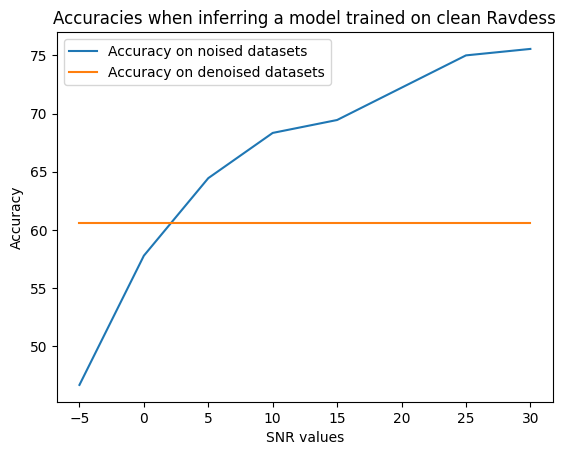

In [ ]:
#plotting the results
snr_values = [-5, 0, 5, 10, 15, 20, 25, 30]
accuracies_on_noised = [46.6667, 57.7778, 64.4444, 68.3333, 69.4444, 72.2222, 75, 75.5556   ]
accuracies_on_denoised = [60.55]*8
plt.plot(snr_values, accuracies_on_noised, label = 'Accuracy on noised datasets')
plt.plot(snr_values, accuracies_on_denoised, label = 'Accuracy on denoised datasets')
plt.legend()
plt.xlabel('SNR values')
plt.ylabel('Accuracy')
plt.title('Accuracies when inferring a model trained on clean Ravdess')
plt.show()

- The **blue** plot is the result of inference on noised versions of Ravdess,using the model that was trained on clean Ravdess.
- The orange plot is the result of inference on the denoised versions (denoised using SepFormer pre-trained on WHAM!).
- **Conclusion**: Denoising seems to only improve the accuracy for very low SNR values (in this case for -5 and 0 dB). Another interesting observation is that the accuracy on the denoised sets is exactly the same regardless of initial snr values !

## Analysis of denoised audios

Here, we'll import one same audio chosen randomly from ravdess, noised at -5dB and then at 30dB. We will then denoise it using Sepformer, and visualize the waveforms.

In [ ]:
noised_file_path_n5 = '/content/noised_ravdess/SNR_-5/Actor_01/03-01-02-01-01-01-01.wav' #n5: -5
noised_file_path_30 ='/content/noised_ravdess/SNR_30/Actor_01/03-01-02-01-01-01-01.wav'
speech_enhancer = separator.from_hparams(source="speechbrain/sepformer-wham16k-enhancement", savedir='pretrained_models/sepformer-wham16k-enhancement', run_opts={"device":"cuda"})
denoised_n5 = speech_enhancer.separate_file(path=noised_file_path_n5)
torchaudio.save("denoised_n5.wav", denoised_n5[:, :, 0].detach().cpu(), 16000)
denoised_30 = speech_enhancer.separate_file(path=noised_file_path_30)
torchaudio.save("denoised_30.wav", denoised_30[:, :, 0].detach().cpu(), 16000)

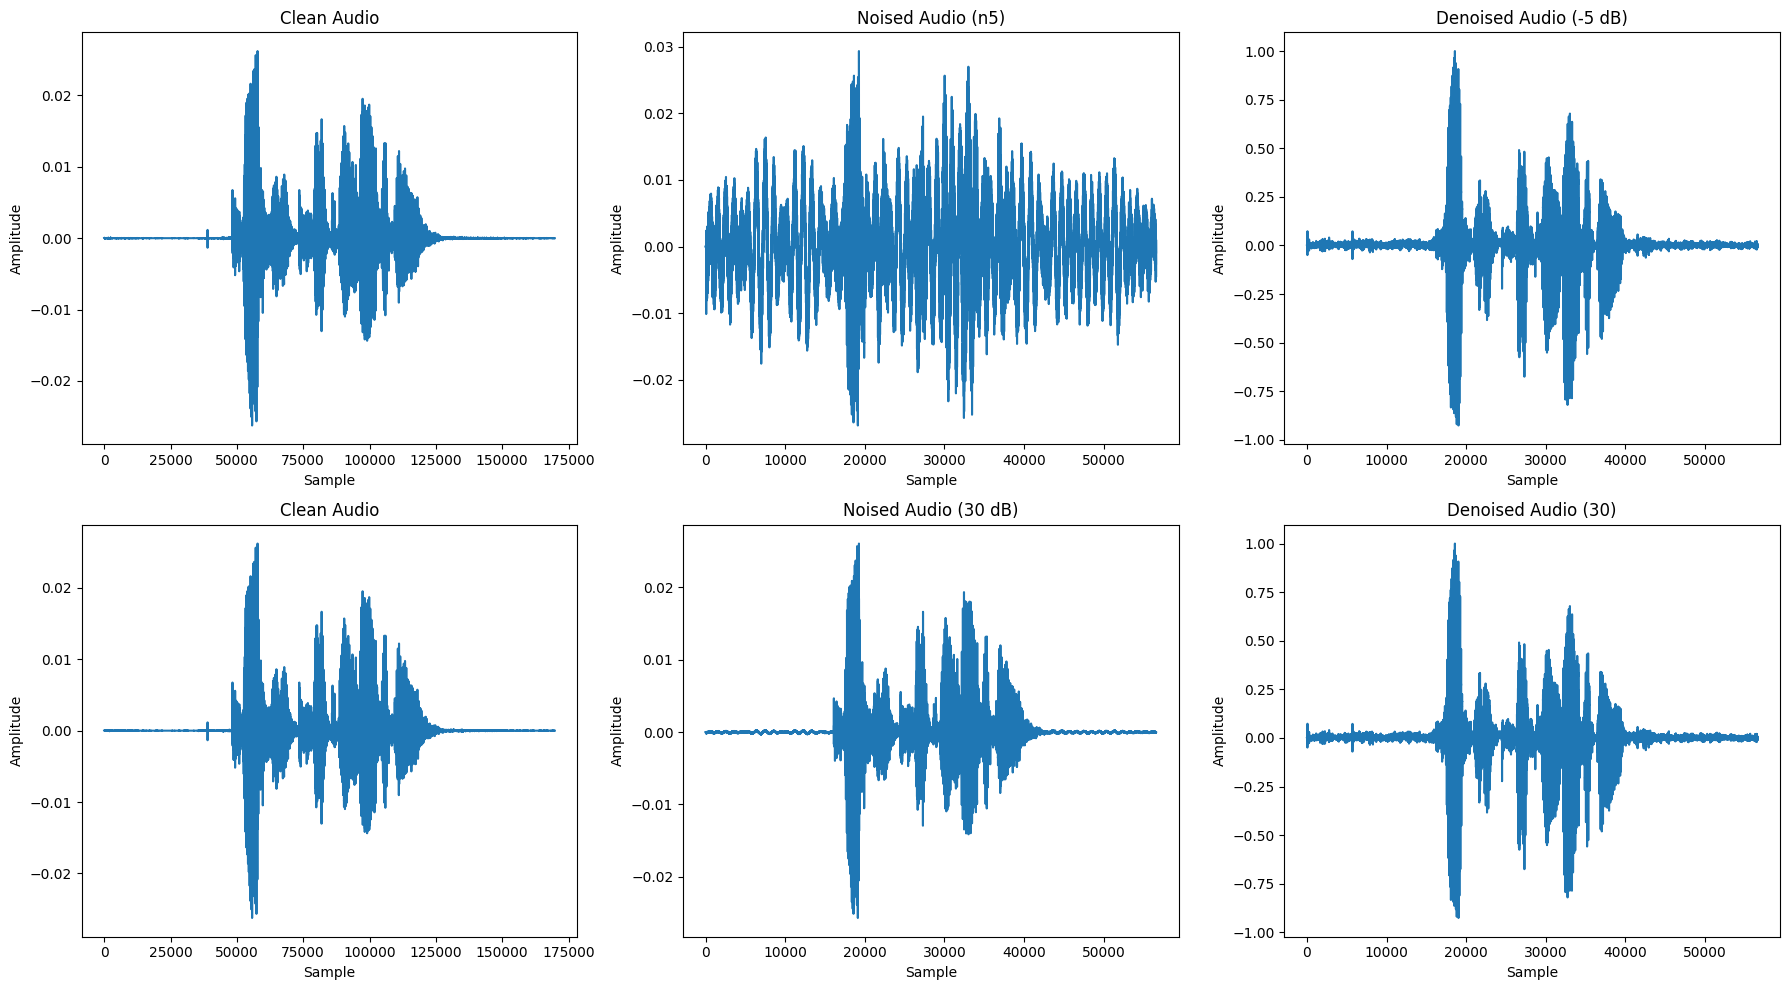

In [ ]:
clean_audio, sample_rate = torchaudio.load('/content/clean_ravdess/Actor_01/03-01-02-01-01-01-01.wav')
noised_1, _ = torchaudio.load(noised_file_path_n5)
noised_2, _ = torchaudio.load(noised_file_path_30)
denoised_1, _ = torchaudio.load('/content/denoised_n5.wav')
denoised_2, _ = torchaudio.load('/content/denoised_30.wav')

plt.figure(figsize=(18, 10))

# First row: clean, noised_1, denoised_1
plt.subplot(2, 3, 1)
plt.plot(clean_audio.t().numpy())
plt.title('Clean Audio')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(2, 3, 2)
plt.plot(noised_1.t().numpy())
plt.title('Noised Audio (n5)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(2, 3, 3)
plt.plot(denoised_1.t().numpy())
plt.title('Denoised Audio (-5 dB)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Second row: clean, noised_2, denoised_2
plt.subplot(2, 3, 4)
plt.plot(clean_audio.t().numpy())
plt.title('Clean Audio')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(2, 3, 5)
plt.plot(noised_2.t().numpy())
plt.title('Noised Audio (30 dB)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(2, 3, 6)
plt.plot(denoised_2.t().numpy())
plt.title('Denoised Audio (30)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


Same clean audio, same noise added to the clean audio at 2 different snrs, yet when passed through the denoiser, the outputs seem quite similar. Let's look at the difference between the two denoised audios:

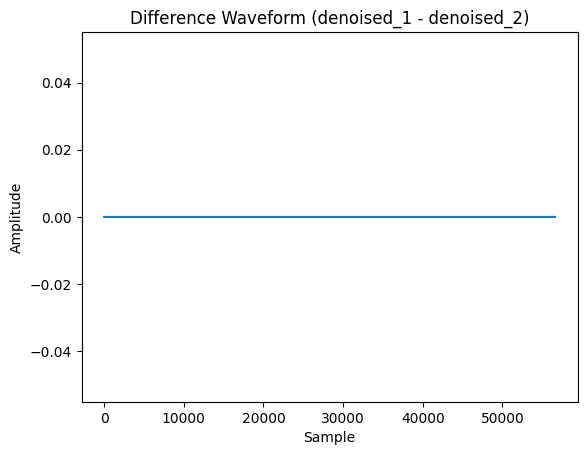

In [ ]:
difference_waveform = denoised_1 - denoised_2
plt.plot(difference_waveform.t().numpy())
plt.title('Difference Waveform (denoised_1 - denoised_2)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

The denoised audios are perfectly identical !

## 2nd experiment : Training the model on denoised data

The brief analysis conducted in the previous section shows that the output of the denoiser is quite indifferent to the initial snr value. So it might be interesting to train the model on denoised audios (given that they all *kind of* sound alike).

In [ ]:
#import the function to train the model
%cd '/content/robust-ser'
from train import train_model
%cd ..

/content/robust-ser
GPU available: Tesla T4
/content


We're gonna train the model on the denoised dataset of initial SNR = -5 dB. Technically we could've taken any other snr since after denoising, regardless of initial snr, the outputs are pretty much the same.

In [ ]:
#function to denoise a noised dataset
def denoise_noised_dataset(noised_dataset_path, output_path, speech_enhancer):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    for actor_folder in os.listdir(noised_dataset_path):
        if actor_folder.startswith("Actor_") and actor_folder[-2:].isdigit():
            actor_number = int(actor_folder[-2:])
            #if 20 <= actor_number <= 24: (for when only denoising test folders)
            actor_input_folder = os.path.join(noised_dataset_path, actor_folder)
            actor_output_folder = os.path.join(output_path, actor_folder)

                # Create actor's output folder if it doesn't exist
            if not os.path.exists(actor_output_folder):
                os.makedirs(actor_output_folder)

            for file in os.listdir(actor_input_folder):
                file_path = os.path.join(actor_input_folder, file)
                # Denoise the audio file
                est_sources = speech_enhancer.separate_file(path=file_path)

                # Save denoised file
                output_file_path = os.path.join(actor_output_folder, file)
                torchaudio.save(output_file_path, est_sources[:, :, 0].detach().cpu(), sample_rate=16000)

In [ ]:
#denoise 'noised ravdess at -5dB' (the denoised folder only contains test folders)
denoise_noised_dataset('/content/noised_ravdess/SNR_-5', '/content/Denoised_all/SNR_-5', speech_enhancer )

Map:   0%|          | 0/684 [00:00<?, ? examples/s]

Map:   0%|          | 0/144 [00:00<?, ? examples/s]

Some weights of the model checkpoint at superb/hubert-large-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametri

Epoch 1/10


100%|██████████| 342/342 [02:29<00:00,  2.29it/s, Loss=2.174, Accuracy=0.447]


Epoch 2/10


100%|██████████| 342/342 [02:28<00:00,  2.30it/s, Loss=0.079, Accuracy=0.601]


Epoch 3/10


100%|██████████| 342/342 [02:29<00:00,  2.29it/s, Loss=1.478, Accuracy=0.623]


Epoch 4/10


100%|██████████| 342/342 [02:30<00:00,  2.28it/s, Loss=0.976, Accuracy=0.667]


Epoch 5/10


100%|██████████| 342/342 [02:29<00:00,  2.29it/s, Loss=0.555, Accuracy=0.683]


Epoch 6/10


100%|██████████| 342/342 [02:29<00:00,  2.28it/s, Loss=1.077, Accuracy=0.716]


Epoch 7/10


100%|██████████| 342/342 [02:29<00:00,  2.29it/s, Loss=0.335, Accuracy=0.744]


Epoch 8/10


100%|██████████| 342/342 [02:28<00:00,  2.30it/s, Loss=0.822, Accuracy=0.772]


Epoch 9/10


100%|██████████| 342/342 [02:29<00:00,  2.29it/s, Loss=0.709, Accuracy=0.789]


Epoch 10/10


100%|██████████| 342/342 [02:29<00:00,  2.29it/s, Loss=0.353, Accuracy=0.803]


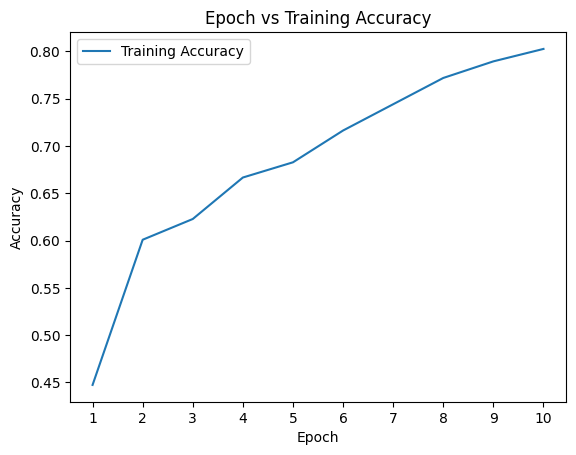

In [ ]:
train_model(dataset_path = '/content/Denoised_all/SNR_-5/', epoch = 10, model_path = '/content/model_denoised_-5' )
#model path : path to save newly trained model

In [ ]:
for folder in os.listdir('/content/denoised_ravdess'):
  folder_path = os.path.join('/content/denoised_ravdess', folder) + '/'
  print(folder)
  model_inference(path_to_db = folder_path , model_path = '/content/model_denoised_-5' )

SNR_10


Some weights of the model checkpoint at superb/hubert-large-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametri

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

100%|██████████| 180/180 [00:12<00:00, 13.88it/s, loss=0.538, accuracy=0.800]


The final accuracy on the test dataset: 80.0%
SNR_-5


Some weights of the model checkpoint at superb/hubert-large-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametri

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

100%|██████████| 180/180 [00:13<00:00, 13.12it/s, loss=0.538, accuracy=0.800]


The final accuracy on the test dataset: 80.0%
SNR_0


Some weights of the model checkpoint at superb/hubert-large-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametri

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

100%|██████████| 180/180 [00:13<00:00, 13.52it/s, loss=0.538, accuracy=0.800]


The final accuracy on the test dataset: 80.0%
SNR_15


Some weights of the model checkpoint at superb/hubert-large-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametri

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

100%|██████████| 180/180 [00:13<00:00, 13.50it/s, loss=0.538, accuracy=0.800]


The final accuracy on the test dataset: 80.0%
SNR_5


Some weights of the model checkpoint at superb/hubert-large-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametri

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

100%|██████████| 180/180 [00:13<00:00, 13.47it/s, loss=0.538, accuracy=0.800]


The final accuracy on the test dataset: 80.0%
SNR_30


Some weights of the model checkpoint at superb/hubert-large-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametri

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

100%|██████████| 180/180 [00:13<00:00, 13.56it/s, loss=0.538, accuracy=0.800]


The final accuracy on the test dataset: 80.0%
SNR_20


Some weights of the model checkpoint at superb/hubert-large-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametri

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

100%|██████████| 180/180 [00:13<00:00, 13.56it/s, loss=0.538, accuracy=0.800]


The final accuracy on the test dataset: 80.0%
SNR_25


Some weights of the model checkpoint at superb/hubert-large-superb-er were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-large-superb-er and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametri

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

100%|██████████| 180/180 [00:13<00:00, 13.60it/s, loss=0.538, accuracy=0.800]


The final accuracy on the test dataset: 80.0%


Text(0.5, 1.0, 'Accuracies VS snr')

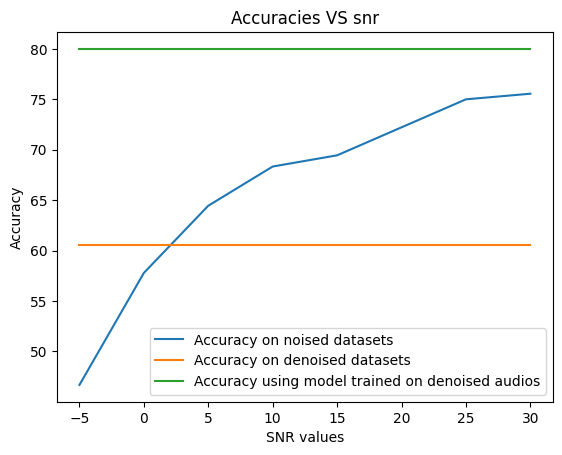

In [ ]:
#plotting the results
snr_values = [-5, 0, 5, 10, 15, 20, 25, 30]
accuracies_on_noised = [46.6667, 57.7778, 64.4444, 68.3333, 69.4444, 72.2222, 75, 75.5556   ]
accuracies_on_denoised = [60.55]*8
accuracies_on_denoised_with_model_trained_on_denoised = [80]*8
plt.plot(snr_values, accuracies_on_noised, label = 'Accuracy on noised datasets')
plt.plot(snr_values, accuracies_on_denoised, label = 'Accuracy on denoised datasets')
plt.plot(snr_values, accuracies_on_denoised_with_model_trained_on_denoised, label = 'Accuracy using model trained on denoised audios')
plt.legend()
plt.xlabel('SNR values')
plt.ylabel('Accuracy')
plt.title('Accuracies VS snr')


- The performance of the model trained on denoised data is completly insensitive to initial snr value (before denoising).

⚠ When rerunning the code here, we got slightly different results from what we presented in the final presentation (In the results presented in the final presentation, inferring directly on noised data using the model trained on clean Ravdess provided better results for higher snr values, it's not the case here, even though we used the exact same mdoel 😯)